In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


#Carga Completa
Se carga el dataset completo con todos los ejemplares, lo que hace que el proceso de entrenamiento y evaluación sea muy pesado debido a la gran cantidad de datos.

Opciones para Manejar el Dataset Completo:

Reducir el Tamaño del Dataset: Trabajar con una muestra representativa del dataset puede ser útil para realizar pruebas rápidas y desarrollo inicial. Una vez que los resultados sean satisfactorios, se puede proceder a entrenar el modelo con el dataset completo.

Usar Generadores de Datos (Data Generators): Implementar generadores de datos permite cargar imágenes en lotes durante el entrenamiento. Esto reduce el uso de memoria y facilita el trabajo con datasets más grandes, mejorando la eficiencia.

Ajustar el Tamaño del Batch: Modificar el tamaño del batch puede influir en la utilización de la memoria y en el tiempo de entrenamiento. Experimentar con diferentes tamaños puede ayudar a encontrar un equilibrio óptimo.

Aumento de Datos (Data Augmentation): Aplicar técnicas de aumento de datos mejora la capacidad de generalización del modelo sin necesidad de incrementar el tamaño del dataset físico. Esto se logra al generar variaciones de las imágenes durante el entrenamiento.

Entrenamiento con Transferencia: Si se utiliza un modelo complejo, se puede considerar la transferencia de aprendizaje con una red preentrenada. Esto permite reducir el tiempo de entrenamiento al reutilizar pesos que ya han sido aprendidos en un dataset más grande.



In [ ]:

# Cargar el dataset completo tf_flowers
dataset = tfds.load('tf_flowers', split='train', as_supervised=True)

# Preprocesamiento: redimensionar y normalizar
def preprocess_img(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Aumento de datos
def augment_img(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return preprocess_img(image, label)

# Aleatorizar, preprocesar y dividir en entrenamiento (80%) y prueba (20%)
dataset = dataset.shuffle(1024).map(augment_img)

# Calcular el tamaño total del dataset
total_size = tf.data.experimental.cardinality(dataset).numpy()
train_size = int(0.8 * total_size)  # 80% para entrenamiento
train_dataset = dataset.take(train_size).batch(32)
test_dataset = dataset.skip(train_size).batch(32)

# Construir y compilar el modelo con una arquitectura CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compilar el modelo con función de pérdida y métrica de precisión
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(train_dataset, epochs=5)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_dataset)
print("Pérdida en prueba:", loss)
print("Precisión en prueba:", accuracy)

# Capa adicional para calcular probabilidades explícitamente
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Obtener probabilidades de las primeras 5 imágenes de prueba
probabilities = probability_model.predict(test_dataset.take(1).unbatch().map(lambda img, lbl: img).batch(5))
print("Probabilidades de las primeras 5 imágenes de prueba:")
print(probabilities)





#Primer Entrenamiento Capa densa con limitación de ejemplos a 50

Tipo de Modelo: Red Neuronal Densa (DNN)
Características:
* Usa Flatten, que aplana las imágenes para alimentarlas a capas densas.
* Solo utiliza capas densas (Dense), sin capas convolucionales.
* Uso: Este modelo está más alineado con un enfoque de aprendizaje menos sofisticado para imágenes, ya que no extrae características espaciales de las imágenes.

Decisión Tomada: Después de evaluar estas opciones, hemos decidido utilizar un subconjunto más pequeño del dataset, lo que nos permitirá entrenar y evaluar el modelo de manera más eficiente sin sacrificar demasiado la calidad del aprendizaje.

Características del dataset: FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
})
Cantidad de ejemplos: 3670
Clases: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 690ms/step - accuracy: 0.1142 - loss: 31.7070
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.1692 - loss: 126.4805
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.1692 - loss: 108.0657
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.1350 - loss: 34.9804
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.3146 - loss: 27.1248
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.2534 - loss: 19.7971
Pérdida en prueba: 19.986509323120117
Precisión en prueba: 0.2475138157606125


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probabilidades de las primeras 5 imágenes de prueba:
[[0.14888795 0.14885662 0.40454352 0.14885594 0.14885594]
 [0.14886634 0.14893971 0.4044613  0.14886634 0.14886634]
 [0.4042507  0.14889315 0.14907034 0.14889292 0.14889292]
 [0.17492214 0.15335804 0.36510772 0.15330605 0.15330605]
 [0.14929572 0.14893866 0.4038884  0.1489386  0.1489386 ]
 [0.14900693 0.1489008  0.4043253  0.14888354 0.14888354]
 [0.14884806 0.14884767 0.40460888 0.14884767 0.14884767]
 [0.14914092 0.15029952 0.40227833 0.14914063 0.1491405 ]
 [0.14885944 0.14885005 0.40459046 0.14885001 0.14885001]
 [0.14887539 0.14885512 0.4045624  0.14885357 0.14885357]
 [0.14884835 0.14884776 0.40460837 0.14884774 0.14884774]
 [0.35140917 0.15460941 0.18481421 0.15458357 0.15458357]
 [0.36110237 0.15418912 0.17729388 0.15370728 0.15370728]
 [0.24379574 0.1585911  0.280431   0.1585911  0.1585911 ]
 [0.15552449 0.19263028 0.34091926 0.15546302 0.15546294]
 [0.15063968 0.15822124 0.38985977 0.15

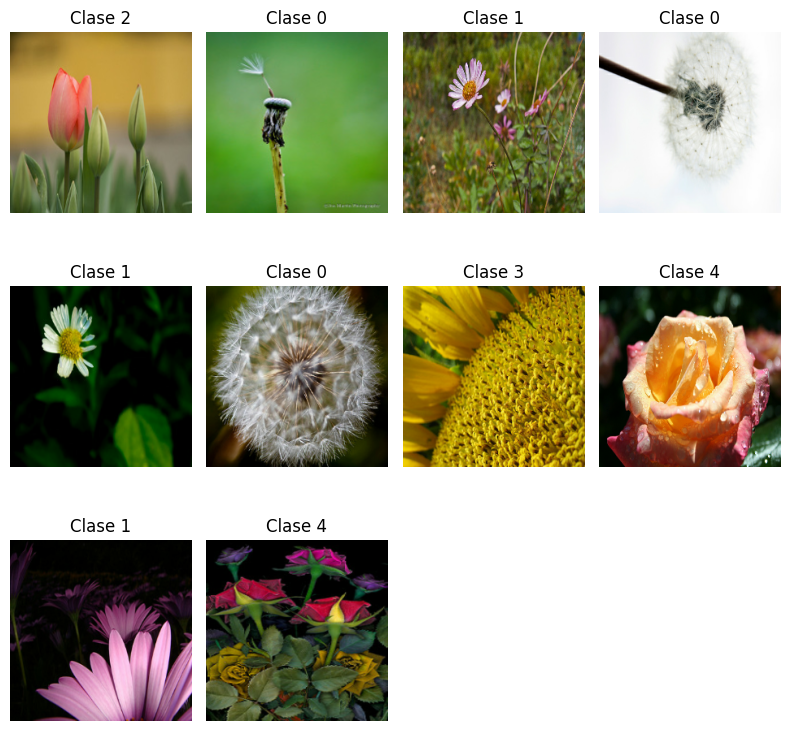

In [11]:

# Ver información básica sobre el dataset
info = builder.info
print("Características del dataset:", info.features)
print("Cantidad de ejemplos:", info.splits['train'].num_examples)
print("Clases:", info.features['label'].names)


# Cargar el dataset completo tf_flowers
dataset = tfds.load('tf_flowers', split='train', as_supervised=True)

# Preprocesamiento: redimensionar y normalizar
def preprocess_img(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Aleatorizar, preprocesar, y dividir en entrenamiento (80%) y prueba (20%)
dataset = dataset.shuffle(1024).map(preprocess_img)
train_dataset = dataset.take(50).batch(32)
test_dataset = dataset.skip(50).batch(32)  # El resto se usa para prueba



# Construir y compilar el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')  # Softmax para salida de probabilidad
])

# Compilar el modelo con función de pérdida y métrica de precisión
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(train_dataset, epochs=5)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_dataset)
print("Pérdida en prueba:", loss)
print("Precisión en prueba:", accuracy)

# Capa adicional para calcular probabilidades explícitamente
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Obtener probabilidades de las primeras 5 imágenes de prueba
probabilities = probability_model.predict(test_dataset.take(1).unbatch().map(lambda img, lbl: img).batch(5))
print("Probabilidades de las primeras 5 imágenes de prueba:")
print(probabilities)

# Visualizar una muestra de 10 imágenes en una cuadrícula pequeña
plt.figure(figsize=(8, 8))
for i, (image, label) in enumerate(train_dataset.unbatch().take(10)):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Clase {label.numpy()}")
    plt.axis("off")
plt.tight_layout()
plt.show()

#Resultado de un entrenamiento del modelo de clasificación de imágenes.

Modelo de red neuronal que está siendo utilizado para clasificar imágenes de flores en cinco categorías: diente de león (dandelion), margarita (daisy), tulipanes (tulips), girasoles (sunflowers) y rosas (roses).

##La salida:
_Características del Dataset_
- Estructura: Cada ejemplo del dataset incluye una imagen (image) de tamaño variable (sin especificar dimensiones) y una etiqueta (label) que indica a qué clase pertenece la imagen.
- Cantidad de Ejemplos: Hay un total de 3,670 imágenes en el dataset.
- Clases: Se clasifican en 5 tipos de flores.

_Resultados del Entrenamiento_
- Épocas (Epochs): El modelo fue entrenado durante 5 épocas. Cada época es una iteración completa sobre todo el dataset.

A medida que avanza el entrenamiento, la precisión y la pérdida son métricas importantes para evaluar el rendimiento del modelo. En este caso, la precisión está aumentando lentamente, lo que indica que el modelo está mejorando su capacidad para clasificar correctamente las imágenes. Sin embargo, la pérdida en la segunda época es bastante alta, lo que sugiere que el modelo estaba teniendo dificultades en esa fase.



"Acutalización de código
Aumento de Datos:

Se agregó la función augment_img que aplica aumentos de datos, como voltear aleatoriamente las imágenes tanto horizontal como verticalmente.

Preprocesamiento Mejorado:

La función de preprocesamiento ahora incluye solo la redimensión y normalización, y la función de aumento se llama en el mapa.

Separación de Datos:

Se ajustó el proceso de separación para que use el total de ejemplos del conjunto de datos, calculando train_size a partir de los datos cargados.

Modificación en el Modelo:

Se mantuvo la arquitectura CNN   pero se utilizó un Dropout del 0.2 en lugar del 0.5 para ajustar la regularización.

Entrenamiento del Modelo:

Se conservó la llamada a fit pero ahora se sugiere que aumentes el número de épocas (recomendado 10 o más en un entrenamiento real).


Tipo de Modelo: Red Neuronal Convolucional (CNN)
Características:
* Usa Conv2D y MaxPooling2D, que son esenciales para las CNNs y permiten la  extracción de características espaciales.
* Combina capas convolucionales con capas densas después de aplanar las características extraídas.
* Uso: Este enfoque es más adecuado para tareas de clasificación de imágenes, ya que aprovecha la estructura de las imágenes para aprender características.

#Resultados de la Evaluación

Evaluación en el conjunto de prueba:
Precisión: 25.34%
Pérdida: 19.7971
Estos valores son un poco más bajos que los resultados del entrenamiento, lo que podría indicar que el modelo está sobreajustado (overfitting) o que necesita más entrenamiento o mejoras en la arquitectura.

Probabilidades de Predicción
Las probabilidades mostradas para las primeras 5 imágenes de prueba indican cómo el modelo clasifica cada imagen en cada clase:

Cada fila corresponde a una imagen de prueba, y cada valor representa la probabilidad de que la imagen pertenezca a cada una de las 5 clases.
Por ejemplo, para la primera imagen, el modelo predice que hay un 40.45% de probabilidad de que sea un tulipán y 14.89% para las otras clases, lo que sugiere que el modelo está más confiado en esa predicción.
Advertencia sobre tf.function
La advertencia que aparece indica que el modelo está experimentando un problema de "re-trazado excesivo" al usar la función tf.function. Esto puede ocurrir por:

Crear funciones de TensorFlow repetidamente en un bucle.
Pasar tensores de diferentes formas.
Pasar objetos de Python en lugar de tensores.
Esto puede afectar el rendimiento y la eficiencia del modelo, por lo que se sugiere revisar cómo se están definiendo y utilizando estas funciones.

#Actualización del código

Dado los problemas encontrados, se realizarán actualizaciones y modificaciones en el código. Se tomará un subconjunto de 100 ejemplares, que se dividirá en un 70% para entrenamiento y un 30% para pruebas.

In [ ]:

# Cargar el dataset completo tf_flowers
dataset = tfds.load('tf_flowers', split='train', as_supervised=True)

# Preprocesamiento: redimensionar y normalizar
def preprocess_img(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Aumento de datos
def augment_img(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return preprocess_img(image, label)

# Tomar un subconjunto de 100 ejemplos
dataset = dataset.take(100).map(augment_img)

# Aleatorizar y dividir en entrenamiento (70%) y prueba (30%)
train_size = int(0.7 * 100)  # 70% de 100 ejemplos
train_dataset = dataset.take(train_size).batch(32)
test_dataset = dataset.skip(train_size).batch(32)

# Construir y compilar el modelo con una arquitectura CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Ajuste de Dropout
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compilar el modelo con función de pérdida y métrica de precisión
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(train_dataset, epochs=5)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_dataset)
print("Pérdida en prueba:", loss)
print("Precisión en prueba:", accuracy)

# Capa adicional para calcular probabilidades explícitamente
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Obtener probabilidades de las primeras 5 imágenes de prueba
probabilities = probability_model.predict(test_dataset.take(1).unbatch().map(lambda img, lbl: img).batch(5))
print("Probabilidades de las primeras 5 imágenes de prueba:")
print(probabilities)

# Visualizar una muestra de 10 imágenes en una cuadrícula pequeña
plt.figure(figsize=(8, 8))
for i, (image, label) in enumerate(train_dataset.unbatch().take(10)):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Clase {label.numpy()}")
    plt.axis("off")
plt.tight_layout()
plt.show()
